# Moving windows

In [1]:
import sys
sys.path.insert(0, "../src")
import example_helper as eh
import analysis_helper as ah
import msgpack
import zlib
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.pyplot import figure
import pandas as pd
import seaborn as sns; sns.set()

# Get Data

In [2]:
# define the location of the input file
filename_augmento_topics = "../data/example_data/augmento_topics.msgpack.zlib"
filename_augmento_data = "../data/example_data/augmento_data.msgpack.zlib"
filename_bitmex_data = "../data/example_data/bitmex_data.msgpack.zlib"

# load the example data
all_data = eh.load_example_data(filename_augmento_topics,
                             filename_augmento_data,
                             filename_bitmex_data)
aug_topics, aug_topics_inv, t_aug_data, aug_data, t_price_data, price_data = all_data
all_topics = aug_data.T.astype(float)

# calculate PNL for a given strategy
# if sentiment positive go long, else go short
# fees are assumed to be 0.75% (taker fee from BITMEX)

def strategy(price_data, signal_a, signal_b, window_1 = 24 * 7, window_2 = 24*7,buy_sell_fee = 0.0075, pnl_0 = 1.0):    
    sent_score = ah.nb_calc_sentiment_score_b(signal_a,signal_b,window_1,window_2)
    pnl = ah.nb_backtest_a(price_data, sent_score, 1.0, buy_sell_fee)
    return pnl

# PNL of various moving window size for a given combination of topics

# Test strategies with adding noise to moving windows

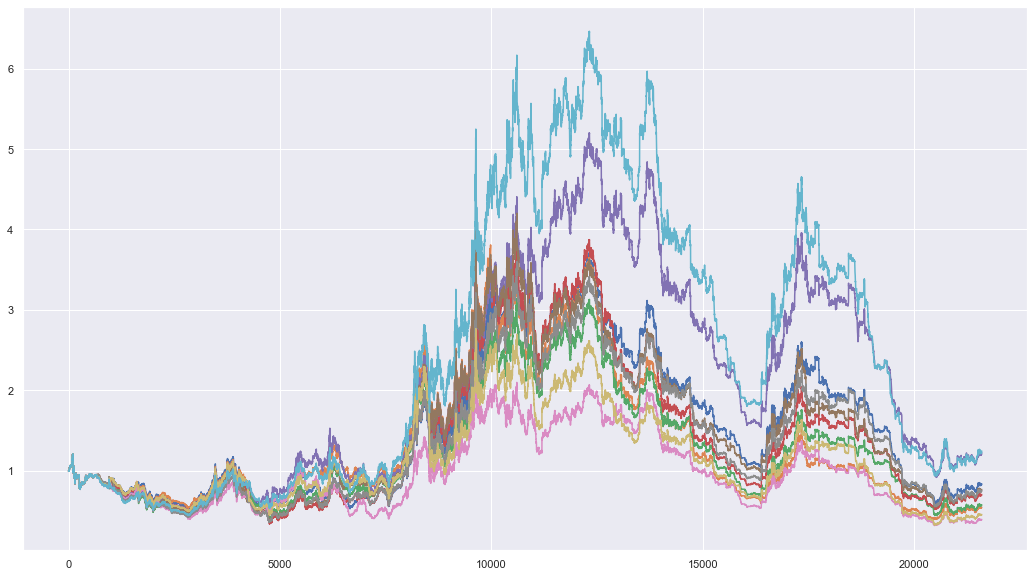

In [53]:
sensit = 0.01
aug_signal_a = aug_data[:, aug_topics_inv["Positive"]].astype(np.float64)
aug_signal_b = aug_data[:, aug_topics_inv["Bearish"]].astype(np.float64)

short_win = 26*24
long_win = 7*24

sent_score = ah.nb_calc_sentiment_score_rand_a(aug_signal_a, aug_signal_b, short_win, long_win,sensit)
a = ah.nb_backtest_a(price_data, sent_score, start_pnl = 1, buy_sell_fee = 0.0075)

for i in range(1,10):
    short_win_ran = np.int64(np.round(np.random.normal(short_win, np.float64(short_win) * 0.01)))
    long_win_ran = np.int64(np.round(np.random.normal(long_win, np.float64(long_win) * 0.01)))
    #short_win_ran, long_win_ran = short_win, long_win
    sent_score = ah.nb_calc_sentiment_score_rand_a(aug_signal_a, aug_signal_b, short_win_ran, long_win_ran,sensit)
    cum_ret = ah.nb_backtest_a(price_data, sent_score, start_pnl = 1, buy_sell_fee = 0.0075)
    a = np.vstack((a, cum_ret))
    #print(cum_ret)

figure(num=None, figsize=(18, 10))
plt.plot(a.T)
plt.show()  

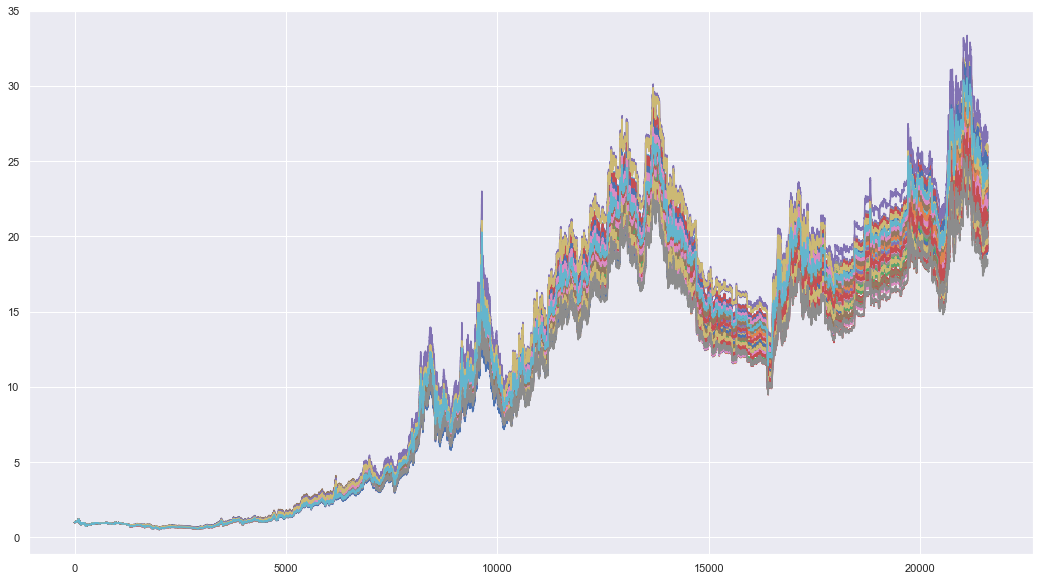

In [40]:
sensit = 0.001
aug_signal_a = aug_data[:, aug_topics_inv["Positive"]].astype(np.float64)
aug_signal_b = aug_data[:, aug_topics_inv["Bearish"]].astype(np.float64)
sent_score = ah.nb_calc_sentiment_score_rand_a(aug_signal_a, aug_signal_b, 27*24, 17*24,sensit)
a = ah.nb_backtest_a(price_data, sent_score, start_pnl = 1, buy_sell_fee = 0.0075)

for i in range(1,100):
    sent_score = ah.nb_calc_sentiment_score_rand_a(aug_signal_a, aug_signal_b, 27*24, 17*24, sensit)
    cum_ret = ah.nb_backtest_a(price_data, sent_score, start_pnl = 1, buy_sell_fee = 0.0075)
    a = np.vstack((a, cum_ret))
    #print(cum_ret)

figure(num=None, figsize=(18, 10))
plt.plot(a.T)
plt.show()  

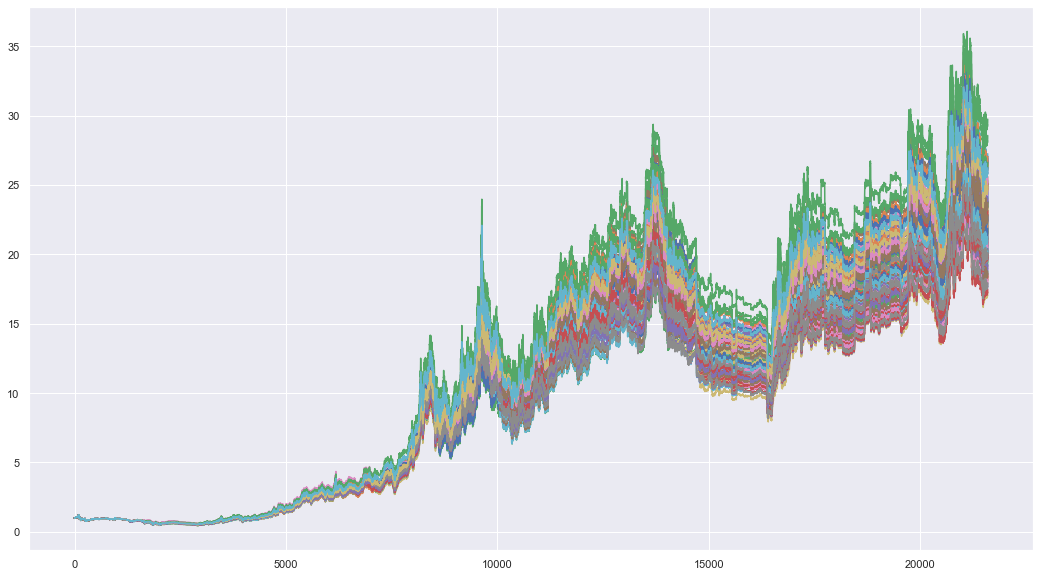

In [41]:
sensit = 0.001
aug_signal_a = aug_data[:, aug_topics_inv["Positive"]].astype(np.float64)
aug_signal_b = aug_data[:, aug_topics_inv["Bearish"]].astype(np.float64)
sent_score = ah.nb_calc_sentiment_score_rand_a(aug_signal_a, aug_signal_b, 28*24, 14*24,sensit)
a = ah.nb_backtest_a(price_data, sent_score, start_pnl = 1, buy_sell_fee = 0.0075)

for i in range(1,100):
    sent_score = ah.nb_calc_sentiment_score_rand_a(aug_signal_a, aug_signal_b, 28*24, 14*24, sensit)
    cum_ret = ah.nb_backtest_a(price_data, sent_score, start_pnl = 1, buy_sell_fee = 0.0075)
    a = np.vstack((a, cum_ret))
    #print(cum_ret)

figure(num=None, figsize=(18, 10))
plt.plot(a.T)
plt.show()  

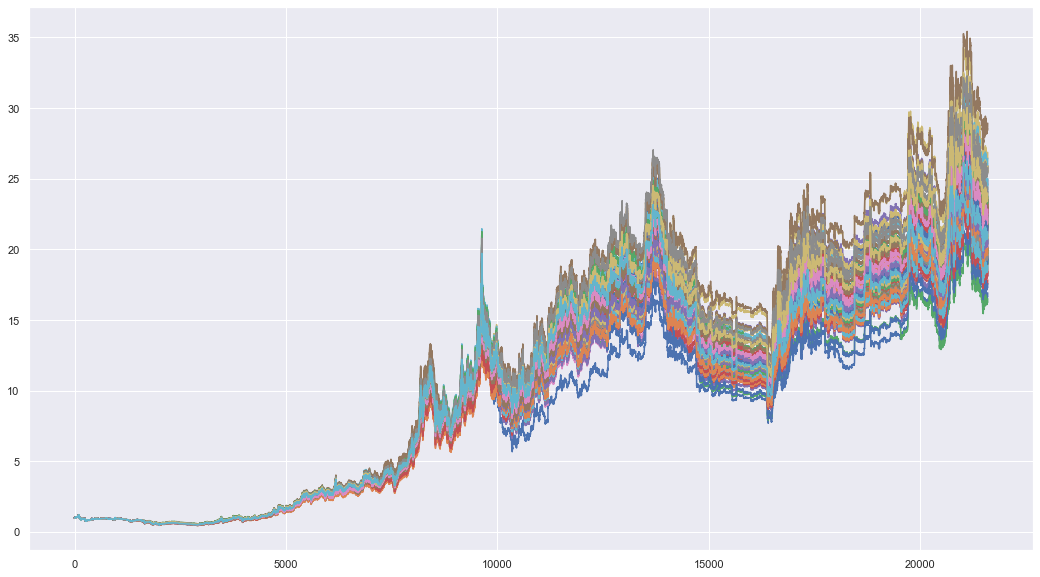

In [42]:
sensit = 0.001
aug_signal_a = aug_data[:, aug_topics_inv["Positive"]].astype(np.float64)
aug_signal_b = aug_data[:, aug_topics_inv["Bearish"]].astype(np.float64)
sent_score = ah.nb_calc_sentiment_score_rand_a(aug_signal_a, aug_signal_b, 28*24, 15*24,sensit)
a = ah.nb_backtest_a(price_data, sent_score, start_pnl = 1, buy_sell_fee = 0.0075)

for i in range(1,100):
    sent_score = ah.nb_calc_sentiment_score_rand_a(aug_signal_a, aug_signal_b, 28*24, 14*24, sensit)
    cum_ret = ah.nb_backtest_a(price_data, sent_score, start_pnl = 1, buy_sell_fee = 0.0075)
    a = np.vstack((a, cum_ret))
    #print(cum_ret)

figure(num=None, figsize=(18, 10))
plt.plot(a.T)
plt.show()  

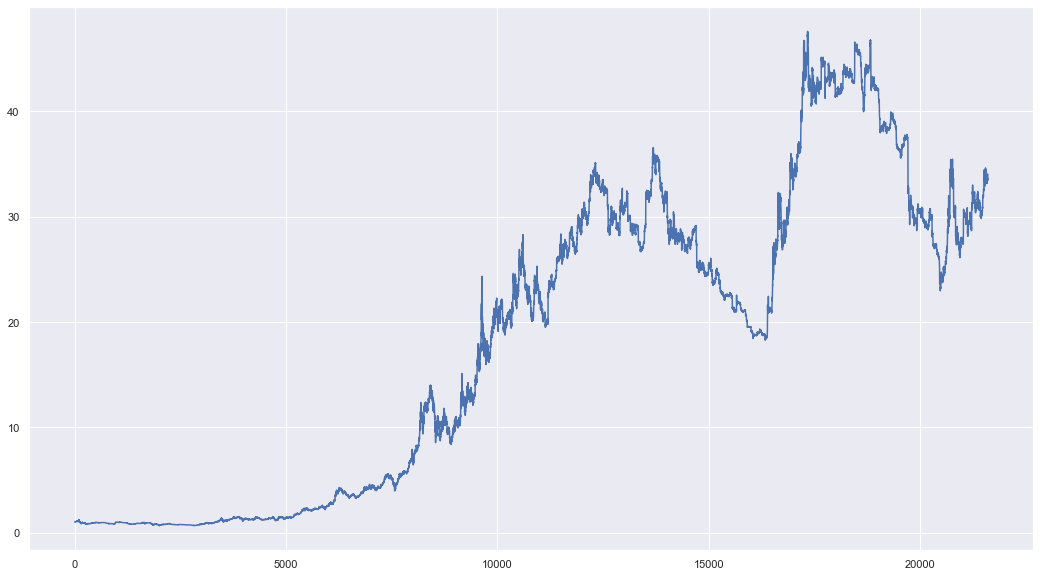

In [29]:
aug_signal_a = aug_data[:, aug_topics_inv["Positive"]].astype(np.float64)
aug_signal_b = aug_data[:, aug_topics_inv["Bearish"]].astype(np.float64)
sent_score = ah.nb_calc_sentiment_score_a(aug_signal_a, aug_signal_b, 26*24, 7*24)
pnl = ah.nb_backtest_a(price_data, sent_score, start_pnl=1, buy_sell_fee = 0.0075)
figure(num=None, figsize=(18, 10))
plt.plot(pnl.T)
plt.show()

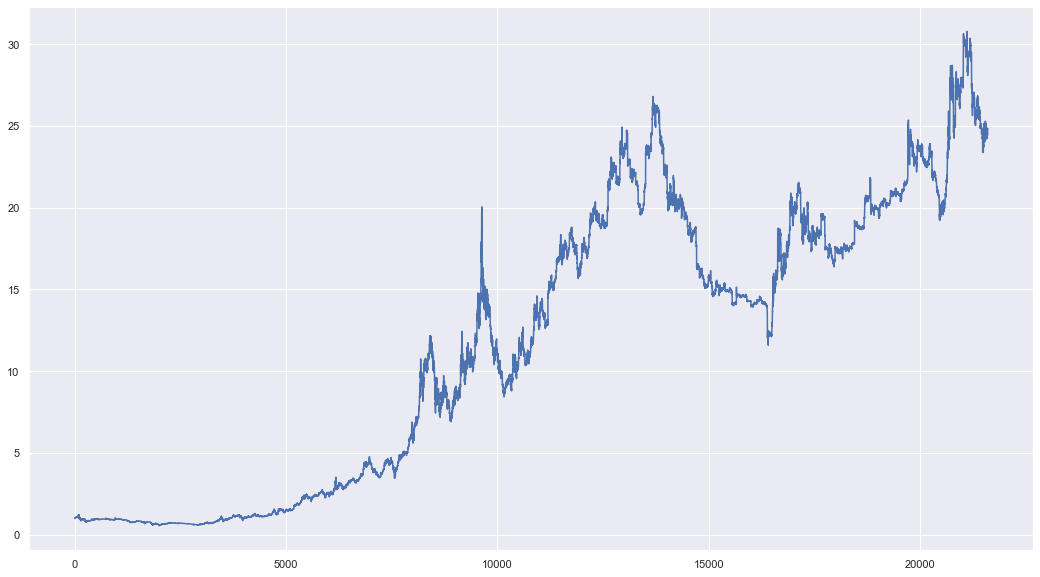

In [31]:
aug_signal_a = aug_data[:, aug_topics_inv["Positive"]].astype(np.float64)
aug_signal_b = aug_data[:, aug_topics_inv["Bearish"]].astype(np.float64)
sent_score = ah.nb_calc_sentiment_score_a(aug_signal_a, aug_signal_b, 27*24, 17*24)
pnl = ah.nb_backtest_a(price_data, sent_score, start_pnl=1, buy_sell_fee = 0.0075)
figure(num=None, figsize=(18, 10))
plt.plot(pnl.T)
plt.show()